In [1]:
import tensorflow as tf
import json
from PIL import Image
from IPython.display import display


2025-04-20 18:58:21.493231: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-20 18:58:21.608061: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-20 18:58:21.608141: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-20 18:58:21.608207: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-20 18:58:21.628835: I tensorflow/core/platform/cpu_feature_g

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

2025-04-20 18:58:23.980288: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
from android_env.proto.a11y import android_accessibility_forest_pb2

/home/cs/anaconda3/envs/appvlm_tf/lib/python3.10/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.29.0 is exactly one major version older than the runtime version 6.30.2 at android_env/proto/a11y/android_accessibility_forest.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/cs/anaconda3/envs/appvlm_tf/lib/python3.10/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.29.0 is exactly one major version older than the runtime version 6.30.2 at android_env/proto/a11y/android_accessibility_window_info.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/cs/anaconda3/envs/appvlm_tf/lib/python3.10/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.29.0 is exactly one major version older than the runtime version 6.30.2 at android_env/pr

In [3]:
dataset = tf.data.TFRecordDataset("./dataset/android_control/android_control-00011-of-00020",compression_type="GZIP")

2025-04-20 18:58:28.414819: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-20 18:58:28.479854: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-20 18:58:28.480280: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
for raw_record in dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())

    # 提取字段
    features = example.features.feature

    goal = features["goal"].bytes_list.value[0].decode("utf-8")
    screenshots = features["screenshots"].bytes_list.value
    widths = features["screenshot_widths"].int64_list.value
    heights = features["screenshot_heights"].int64_list.value
    step_instructions = [s.decode("utf-8") for s in features["step_instructions"].bytes_list.value]
    actions = [json.loads(a.decode("utf-8")) for a in features["actions"].bytes_list.value]
    episode_id = features["episode_id"].int64_list.value[0]
    accessibility_bytes = example.features.feature["accessibility_trees"].bytes_list.value[0]

    # 打印基本信息
    print(f"1 episode_id:{episode_id}")
    print(f"2 Goal: {goal}")
    print(f"3 Total screenshots: {len(screenshots)}")
    print(f"4 Widths: {widths}")
    print(f"5 Heights: {heights}")
    print(f"6 Instructions: {step_instructions}")
    print(f"7 Actions:")
    for i, act in enumerate(actions):
        print(f"  Step {i+1}: {act}")
    print("=" * 100, "\n")

    forest = android_accessibility_forest_pb2.AndroidAccessibilityForest().FromString(example.features.feature['accessibility_trees'].bytes_list.value[3])
    print(forest)



1 episode_id:11
2 Goal: Open TickTick app and share the wedding plan task on dwbscratchid3@google.com through Gmail 
3 Total screenshots: 13
4 Widths: [1080, 1080, 1080, 1080, 1080, 1080, 1080, 1080, 1080, 1080, 1080, 1080, 1080]
5 Heights: [2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400]
6 Instructions: ['Open TickTIck app', 'click on the weeding plan', 'click on the three dots at the top right corner of the screen ', 'go to the share icon ', 'click on the Email option', 'click on the copy link option ', 'go to the share button', 'go to the share button', 'click on the Gmail option', 'Dwbscratchid3@google.com', 'Dwbscratchid3@google.com', 'click on the share button at the top right corner of the screen ']
7 Actions:
  Step 1: {'action_type': 'open_app', 'app_name': 'TickTick'}
  Step 2: {'action_type': 'click', 'x': 544, 'y': 369}
  Step 3: {'action_type': 'click', 'x': 1021, 'y': 201}
  Step 4: {'action_type': 'click', 'x': 407, 'y': 1399}
  Step 5: {'ac

In [17]:
from PIL import Image
import io

image = Image.open(io.BytesIO(screenshots[0]))
image.save("first_screenshot.png")


In [20]:
for i, raw_record in enumerate(dataset.take(1)):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())

    features = example.features.feature

    goal = features["goal"].bytes_list.value[0].decode("utf-8")
    screenshots = features["screenshots"].bytes_list.value

    print(f"🎯 Example #{i} Goal: {goal}")
    for j in range(len(screenshots)):
        image = Image.open(io.BytesIO(screenshots[j]))
        image.save(f"example_{i}_{j}_screenshot.png")


🎯 Example #0 Goal: Open the Zoho Meet app , view the scheduled meetings .


In [7]:
with open("intermediate_data/sample_0.json","r") as f:
    data = json.load(f)

#print(data)

goal = data["goal"]
step_instruction = data["step_instruction"]
action = data["action"]
image_path = data["image_path"]
accessibility_bytes = example.features.feature["accessibility_trees"].bytes_list.value[0]



prompt = f"Goal: {goal}\nInstruction:{step_instruction}\nWhat action should be taken?"

image = Image.open(image_path).convert("RGB")


print(prompt)
#display(image)

print(action)
print("\n")

forest = android_accessibility_forest_pb2.AndroidAccessibilityForest().FromString(accessibility_bytes)
print(forest)




Goal: Open the Zoho Meet app , view the scheduled meetings .
Instruction:Open the Zoho Meet app
What action should be taken?
{'action_type': 'open_app', 'app_name': 'Zoho Meeting'}


windows {
  bounds_in_screen {
    right: 1080
    bottom: 136
  }
  id: 5
  layer: 1
  window_type: TYPE_SYSTEM
  tree {
    nodes {
      bounds_in_screen {
        right: 1080
        bottom: 136
      }
      class_name: "android.widget.FrameLayout"
      package_name: "com.android.systemui"
      text_selection_start: -1
      text_selection_end: -1
      window_id: 5
      is_enabled: true
      is_visible_to_user: true
      actions {
        id: 4
      }
      actions {
        id: 8
      }
      actions {
        id: 64
      }
      actions {
        id: 16908342
      }
      child_ids: 1
      child_ids: 2
      child_ids: 3
    }
    nodes {
      unique_id: 1
      bounds_in_screen {
        right: 1080
        bottom: 136
      }
      class_name: "android.widget.FrameLayout"
      package

In [ ]:
raw_dataset = tf.data.TFRecordDataset("./dataset/android_control/android_control-00000-of-00020",compression_type="GZIP")
dataset_iterator = tf.compat.v1.data.make_one_shot_iterator(raw_dataset)

example = tf.train.Example.FromString(dataset_iterator.get_next().numpy())
features = example.features.feature

screenshots = features["screenshots"].bytes_list.value
forest = android_accessibility_forest_pb2.AndroidAccessibilityForest().FromString(features['accessibility_trees'].bytes_list.value[0])

# 读取 screenshots 和对应的 accessibility trees
screenshots = features["screenshots"].bytes_list.value
trees_raw = features["accessibility_trees"].bytes_list.value

# 检查它们的长度是否一致
print("Number of screenshots:", len(screenshots))
print("Number of accessibility trees:", len(trees_raw))






Number of screenshots: 4
Number of accessibility trees: 4


In [7]:
from PIL import Image, ImageDraw, ImageFont
import io
import matplotlib.pyplot as plt

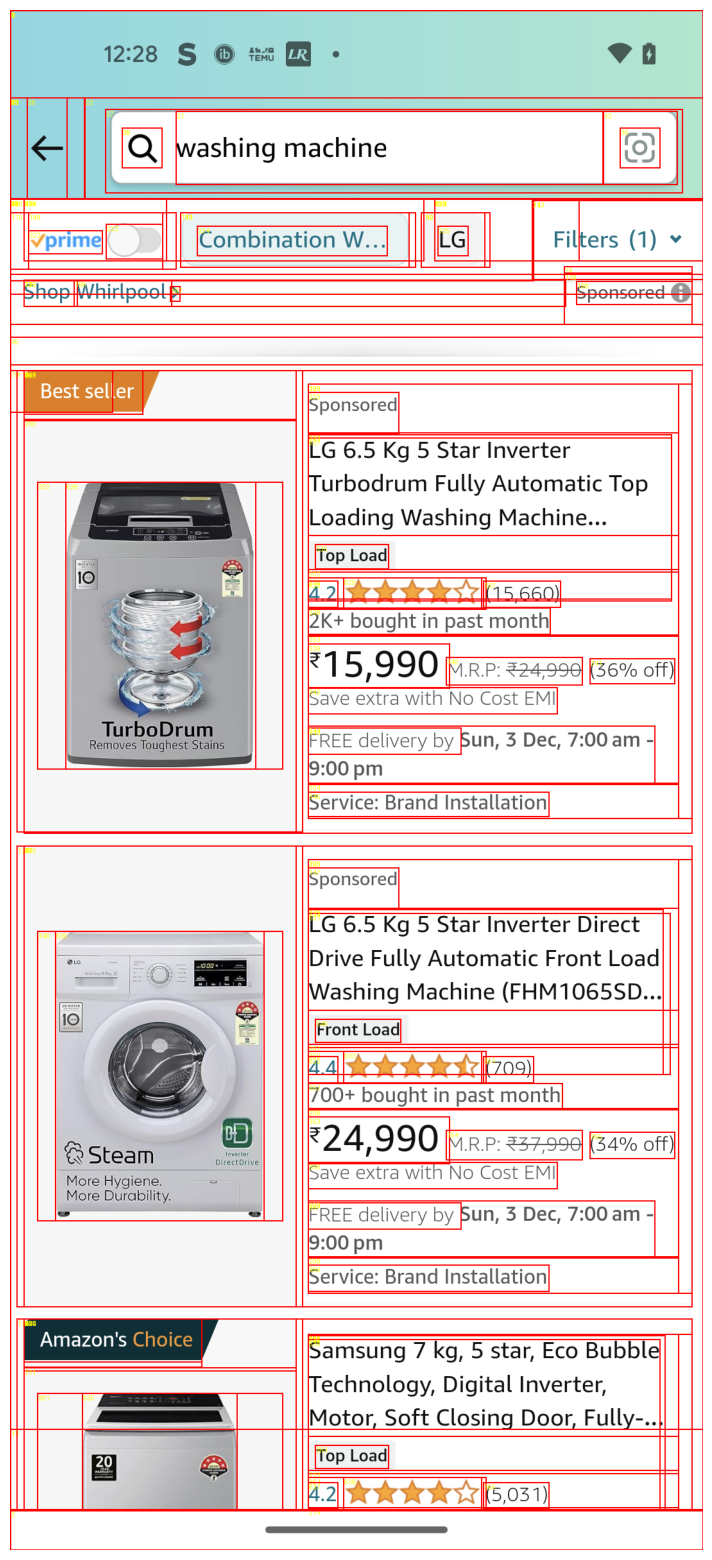

In [11]:
raw_dataset = tf.data.TFRecordDataset("./dataset/android_control/android_control-00005-of-00020",compression_type="GZIP")
dataset_iterator = tf.compat.v1.data.make_one_shot_iterator(raw_dataset)

example = tf.train.Example.FromString(dataset_iterator.get_next().numpy())
features = example.features.feature

screenshots = features["screenshots"].bytes_list.value
forest = android_accessibility_forest_pb2.AndroidAccessibilityForest().FromString(features['accessibility_trees'].bytes_list.value[0])

# 1. 载入 screenshot 图片
image = Image.open(io.BytesIO(screenshots[0])).convert("RGB")

# 2. 绘图准备
draw = ImageDraw.Draw(image)

# 3. 遍历 accessibility tree，画每一个 node 的 bbox
for idx, node in enumerate(forest.windows[1].tree.nodes):  # 默认选择 active window
    b = node.bounds_in_screen
    # 如果 bound 是合法的，绘制矩形和编号
    if b.left < b.right and b.top < b.bottom:
        draw.rectangle([(b.left, b.top), (b.right, b.bottom)], outline="red", width=2)
        draw.text((b.left + 2, b.top + 2), str(idx), fill="yellow")

# 4. 显示图像
plt.figure(figsize=(10, 20))
plt.imshow(image)
plt.axis('off')
plt.show()

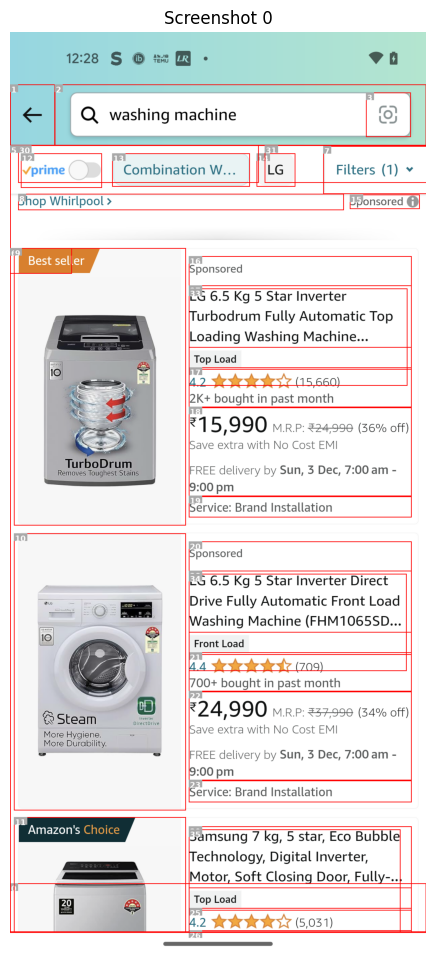

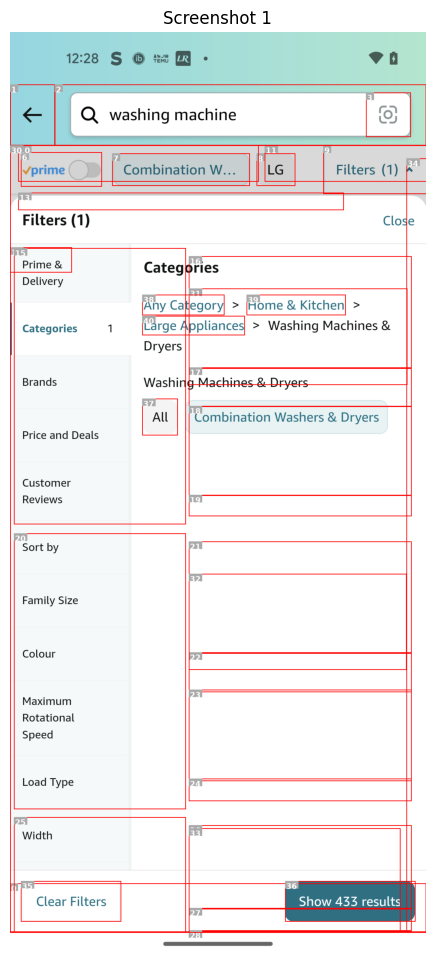

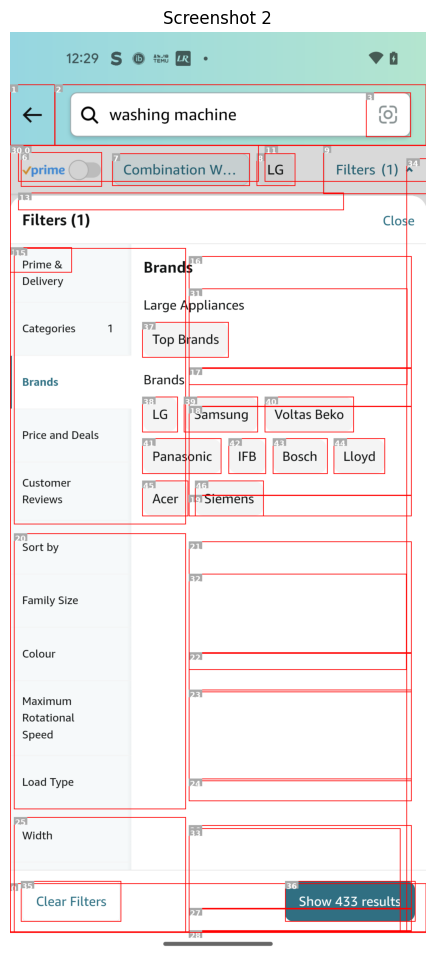

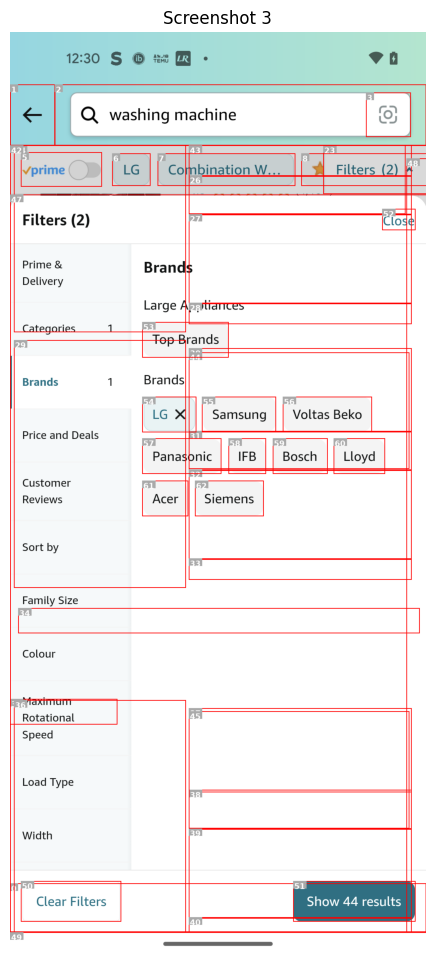

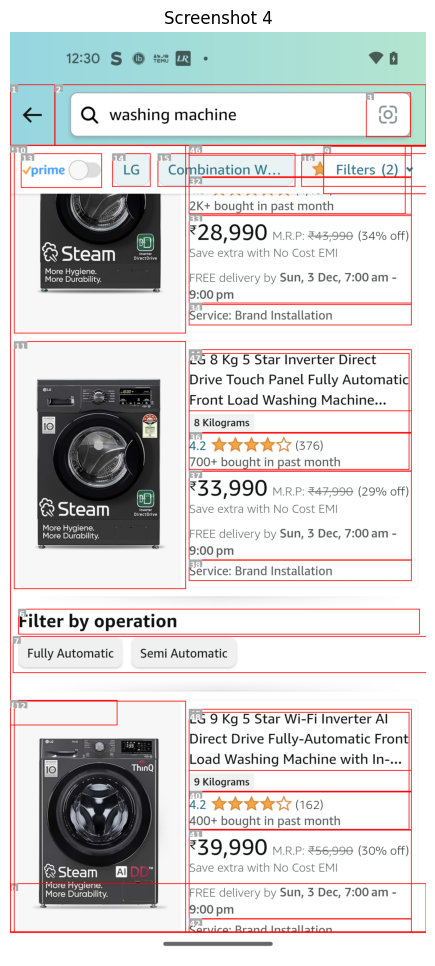

In [12]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import io

# 字体加载（如果有的话）
try:
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"
    font = ImageFont.truetype(font_path, 20)
except IOError:
    font = None

# 判断是否为可交互控件
def is_interactive(node):
    if hasattr(node, "is_clickable") and node.is_clickable:
        return True
    if any(a.id in [1, 16] for a in node.actions):  # click or long_click
        return True
    return False

# 获取截图和树
screenshots = features["screenshots"].bytes_list.value
trees_raw = features["accessibility_trees"].bytes_list.value
trees = [android_accessibility_forest_pb2.AndroidAccessibilityForest().FromString(t) for t in trees_raw]

# 遍历每一帧 observation
for i, (screenshot_bytes, forest) in enumerate(zip(screenshots, trees)):
    image = Image.open(io.BytesIO(screenshot_bytes)).convert("RGB")
    draw = ImageDraw.Draw(image)

    # 选中当前激活窗口
    active_window = next((w for w in forest.windows if w.is_active), forest.windows[-1])

    count = 0
    for node in active_window.tree.nodes:
        b = node.bounds_in_screen
        if b.left < b.right and b.top < b.bottom and is_interactive(node):
            # 绘制红色边框
            draw.rectangle([(b.left, b.top), (b.right, b.bottom)], outline="red", width=2)

            # 计算文字尺寸并绘制灰色半透明背景
            label = str(count)
            if font:
                text_size = draw.textbbox((0, 0), label, font=font)
            else:
                text_size = draw.textbbox((0, 0), label)
            text_width = text_size[2] - text_size[0]
            text_height = text_size[3] - text_size[1]

            # 创建灰色半透明背景
            bg_rect = [(b.left, b.top), (b.left + text_width + 6, b.top + text_height + 4)]
            draw.rectangle(bg_rect, fill=(169, 169, 169, 128))  # 灰色半透明背景

            # 绘制白色文字
            draw.text((b.left + 3, b.top + 2), label, fill="white", font=font)
            count += 1

    # 显示
    plt.figure(figsize=(6, 12))
    plt.title(f"Screenshot {i}")
    plt.imshow(image)
    plt.axis("off")
    plt.show()


In [14]:
import os
print(os.getcwd())  # 输出当前工作目录

/data/chensen/appvlm
